# Exercise 6: Support Vector Machines

In the first half of the exercise 6, we will be using SVMs with various examples 2D datasets. Experimenting with these datasets will help us gain an intuition of how SVMs work and how to use a Gaussian kernel with SVMs and in the next half of the exercise, we will be using SVM to build a spam classifier.

In [132]:
# importing important libraries

# Used for computations of numerical data.
import numpy as np

# Used for reading data and data manipulation
import pandas as pd 

# Used for graphing data.
import matplotlib.pyplot as plt

# Used to load the OCTAVE *.mat files
from scipy.io import loadmat

# Optimization module in scipy
import scipy.io as sio

 
# This is done to suppress tonnes of warning messages that the call to sklearn fit method generates
import warnings
warnings.filterwarnings('ignore')

    
# tells matplotlib to embed plots within the notebook
%matplotlib inline

# ===== Part 1: Loading and Visualizing Data =====

We will begin by with a 2D example dataset which can be separated by a linear boundary.

In [133]:
# Load from ex6data1
# we will have X, y as keys in the dict data
data1 = loadmat("C:\\Users\\nomaniqbal\\Downloads\\notebook\\HomeworkMl\\mlclass-ex6-jin\\ex6data1.mat")
X_1 = data1['X']
y_1 = data1['y']

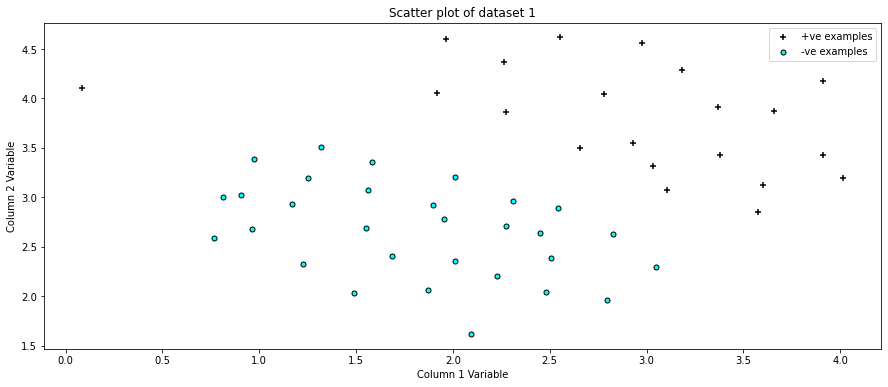

In [134]:
fig1, ax1 = plt.subplots(figsize=(15,6))

def plot_datapoints(X, y, ax):
    X_df = pd.DataFrame(data=X)
    # Indices of training examples where output = +1
    pos = y == 1
    X_pos_df = X_df[pos]
    # Indices of training examples where output = -1
    neg = y == 0
    X_neg_df = X_df[neg]
    ax.scatter(X_pos_df.iloc[:, 0], X_pos_df.iloc[:, 1], c='black', marker='+', cmap=plt.cm.coolwarm, s=30, 
               edgecolors='k', label='+ve examples')
    ax.scatter(X_neg_df.iloc[:, 0], X_neg_df.iloc[:, 1], marker='o', c='cyan', cmap=plt.cm.coolwarm, s=25, 
               edgecolors='k', label='-ve examples')  
    return ax

plot_datapoints(X_1, y_1, ax1)
ax1.set_title('Scatter plot of dataset 1')
ax1.set_xlabel("Column 1 Variable")
ax1.set_ylabel("Column 2 Variable")
ax1.legend()
plt.show()

In this dataset, the positions of the positive examples (indicated with +) and the negative examples (indicated by o) suggest a natural separation indicated by the gap. However, notice that there is an outlier positive example + on the far left at about (0:1; 4:1). As part of this exercise, we will also see how this outlier affects the SVM decision boundary.

# ===== Part 2: Training Linear SVM =====

In this part of the exercise, we will try using different values of the C parameter with SVMs. Informally, the C parameter is a positive value that controls the penalty for misclassified training examples. A large C parameter tells the SVM to try to classify all the examples correctly. C plays a role similar to $1/\lambda$, where $\lambda$ is the regularization parameter that we were using previously for logistic regression.

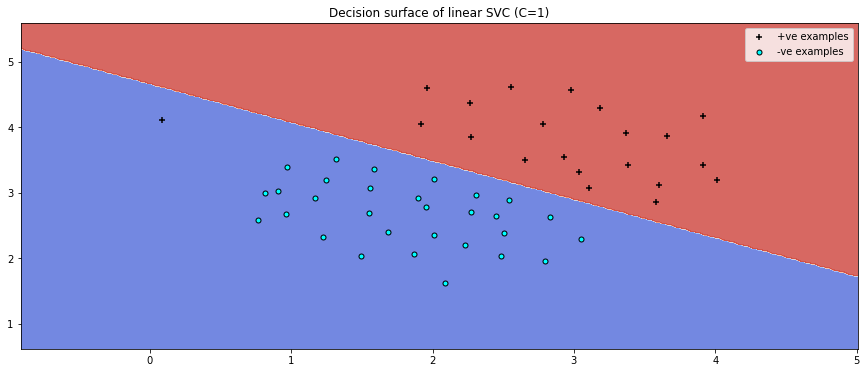

In [135]:
# Fitting a linear support vector classifier and plotting the decision boundary with hyperparameter C=1
from sklearn.svm import LinearSVC

def make_meshgrid(x, y):
    h = .02  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

def fit_model_data(clf, X, y, str_title, fig_size=(15,6)):    
    clf.fit(X, y)
    fig, ax = plt.subplots(figsize=fig_size)
    # title for the plots
    title = str_title
    # Set-up grid for plotting.
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)        
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax = plot_datapoints(X, y, ax)
    ax.set_title(title)
    ax.legend()
    plt.show()
    
clf = LinearSVC(C=1)
plot_title = 'Decision surface of linear SVC (C=1)'

fit_model_data(clf, X_1, y_1, plot_title)    

Note that with sufficient l2 penalty, we avoid overfitting the data and the decision boundary is not unduly impacted by the presence of outliers

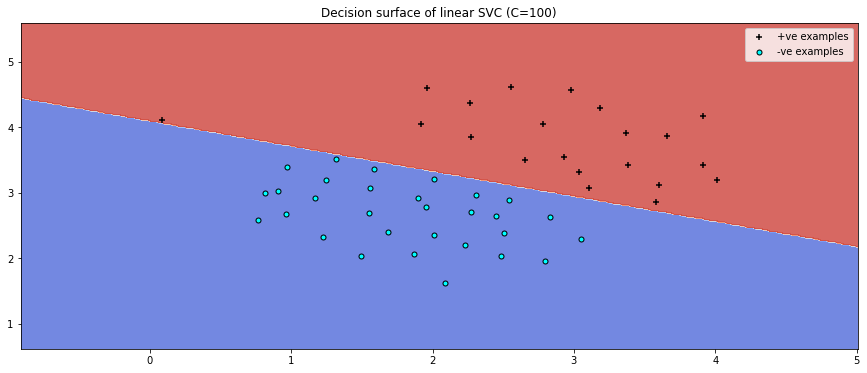

In [136]:
# Now plot the decision boundary with C=100
clf = LinearSVC(C=100, max_iter=50000)
plot_title = 'Decision surface of linear SVC (C=100)'
fit_model_data(clf, X_1, y_1, plot_title)

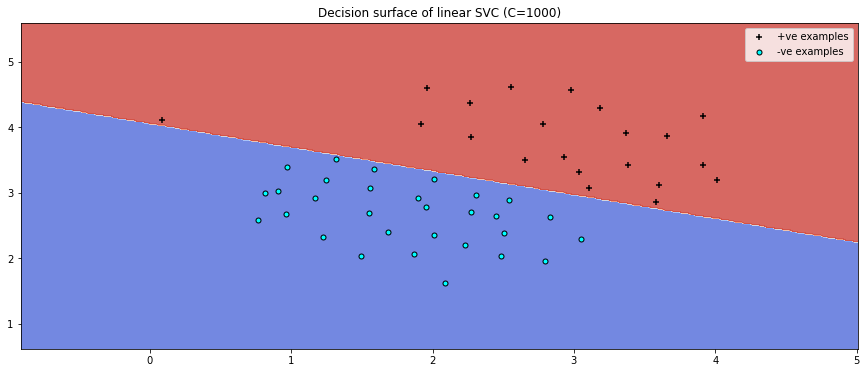

In [137]:
# Now plot the decision boundary with C=1000
clf = LinearSVC(C=1000, max_iter=50000)
plot_title = 'Decision surface of linear SVC (C=1000)'
fit_model_data(clf, X_1, y_1, plot_title)

As we reduce the l2 penalty, the model starts to overfit the training samples and decision boundary shifts to correctly classify the outlier data points

# ===== Part 3: Implementing Gaussian Kernel =====

In this part of the exercise, we will be using SVMs to do non-linear classification. In particular, we will be using SVMs with Gaussian kernels on datasets that are not linearly separable.
**Gaussian Kernel**
To find non-linear decision boundaries with the SVM, we need to first implement a Gaussian kernel. we can think of the Gaussian kernel as a similarity function that measures the “distance” between a pair of examples, $(x^{(i)}, x^{(j)})$. The Gaussian kernel is also parameterized by a bandwidth parameter, $\sigma$, which determines how fast the similarity metric decreases (to 0) as the examples are further apart. we should now complete the code in gaussianKernel to compute the Gaussian kernel between two examples, $(x^{(i)}, x^{(j)})$. 

we can think of the Gaussian kernel as a similarity function that measures the "distance" between a pair of examples, $(x(i); x(j))$. The Gaussian kernel is also parameterized by a bandwidth parameter, sigma, which determines how fast the similarity metric decreases (to 0) as the examples are further apart.

In [138]:
def gaussian_kernel(x1, x2, sigma):
    return np.exp(-(np.sum((x1 - x2) ** 2) / (2 * (sigma ** 2))))
x1 = np.array([1.0, 2.0, 1.0])
x2 = np.array([0.0, 4.0, -1.0])
sigma = 2

gaussian_kernel(x1, x2, sigma)

0.32465246735834974

# ===== Part 4: Visualizing Dataset 2 =====

In this part of the notebook we will load and plot dataset 2.

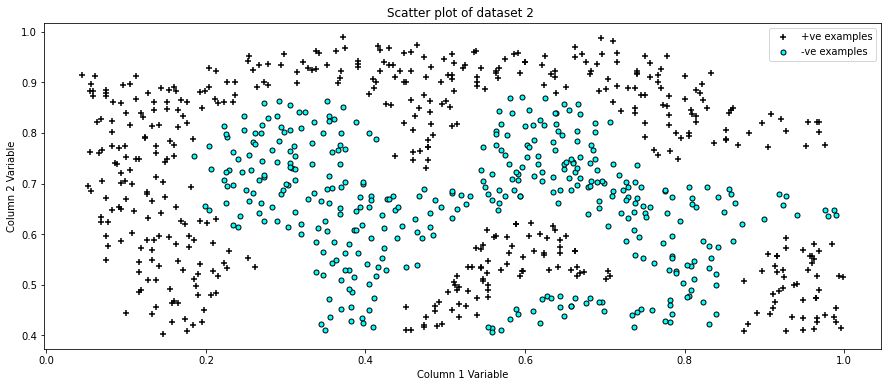

In [139]:
data2 = loadmat('C:\\Users\\nomaniqbal\\Downloads\\notebook\\HomeworkMl\\mlclass-ex6-jin\\ex6data2.mat')
X_2 = data2['X']
y_2 = data2['y']

def plot_data2(X, y, str_title):
    fig2, ax2 = plt.subplots(figsize=(15,6))
    ax2.set_xlabel("Column 1 Variable")
    ax2.set_ylabel("Column 2 Variable")
    title = str_title
    ax2 = plot_datapoints(X, y, ax2)
    ax2.set_title(title)
    ax2.legend()
    plt.show()
    
plot_data2(X_2, y_2, 'Scatter plot of dataset 2 ')   

From the figure, we can obserse that there is no linear decision boundary that separates the positive and negative examples for this dataset. However, by using the Gaussian kernel with the SVM, we will be able to learn a non-linear decision boundary that can perform reasonably well for the dataset. If we have correctly implemented the Gaussian kernel function, the following cell will proceed to train the SVM with the Gaussian kernel on this dataset.

# ===== Part 5: Training SVM with Kernel (Dataset 2) =====

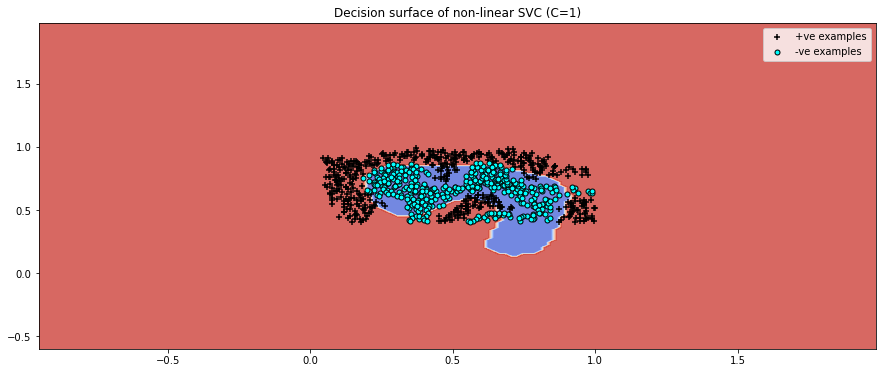

In [140]:
from sklearn.svm import SVC

clf = SVC(C=1)
plot_title = 'Decision surface of non-linear SVC (C=1)'
fit_model_data(clf, X_2, y_2, plot_title)

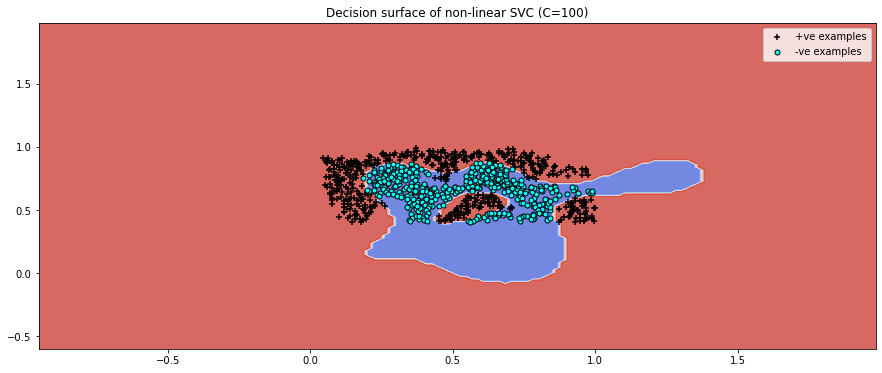

In [141]:
from sklearn.svm import SVC

clf = SVC(C=100)
plot_title = 'Decision surface of non-linear SVC (C=100)'
fit_model_data(clf, X_2, y_2, plot_title)

# ===== Part 6: Visualizing Dataset 3 =====

In this part of the exercise, we will gain more practical skills on how to use a SVM with a Gaussian kernel. In the next cell will load and display a third dataset

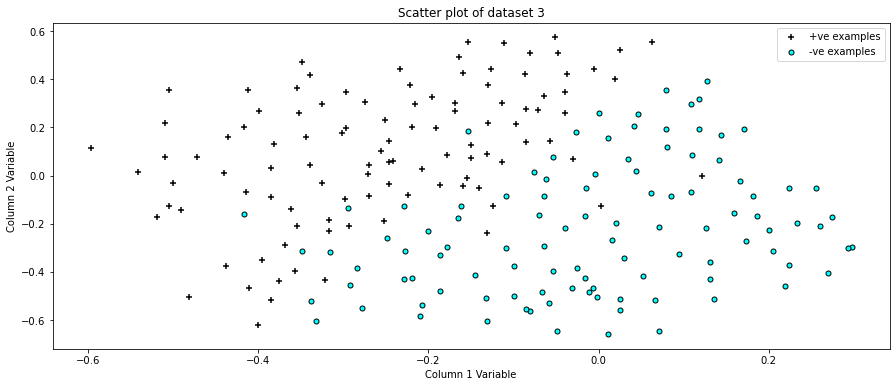

In [142]:
data3 = loadmat('C:\\Users\\nomaniqbal\\Downloads\\notebook\\HomeworkMl\\mlclass-ex6-jin\\ex6data3.mat')
X_3 = data3['X']
y_3 = data3['y']
plot_data2(X_3, y_3, 'Scatter plot of dataset 3')

# ===== Part 7: Training SVM with Kernel (Dataset 3) =====

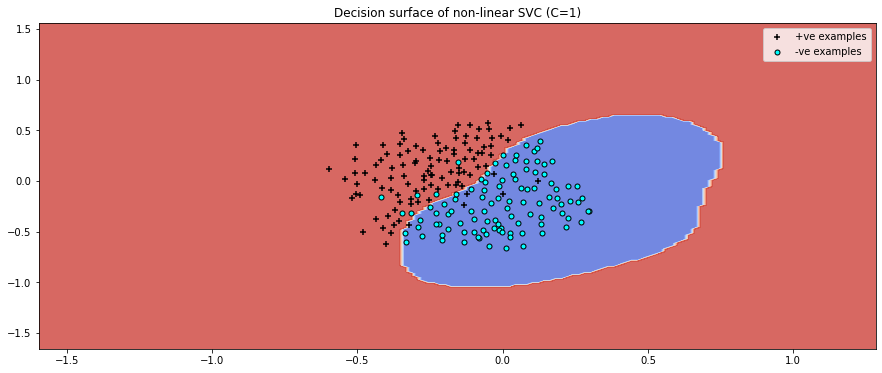

In [127]:
clf = SVC(C=1)
plot_title = 'Decision surface of non-linear SVC (C=1)'
fit_model_data(clf, X_3, y_3, plot_title)

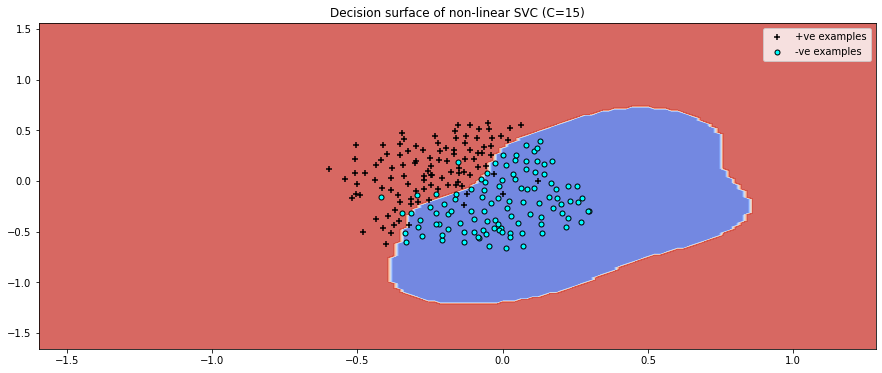

In [143]:
clf = SVC(C=15)
plot_title = 'Decision surface of non-linear SVC (C=15)'
fit_model_data(clf, X_3, y_3, plot_title)

**Hyperparameter tuning for SVC using grid search**   
For both C and siga, we suggest trying values in multiplicative steps (e.g., 0.01; 0.03; 0.1; 0.3; 1; 3; 10; 30). Note that we should try all possible pairs of values for C and (e.g., C = 0.3 and sigma = 0.1). For example, if we try each of the 8 values listed above for C and for sigma squared, we would end up training and evaluating (on the cross validation set) a total of 8e2 = 64 different models.

In [121]:
from sklearn.model_selection import GridSearchCV 

# defining parameter range 
param_grid = {'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30],  
              'gamma': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True)
grid.fit(X_3, y_3)
grid.best_params_

{'C': 30, 'gamma': 3, 'kernel': 'rbf'}

**Decision boundary with the optimized value of hyperparameters C and gamma**

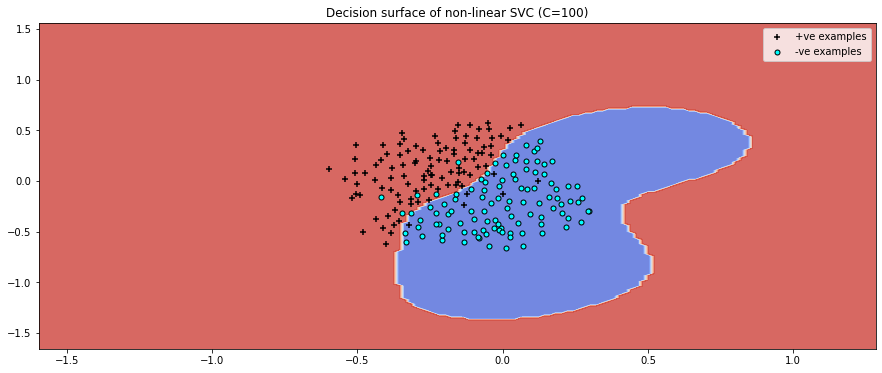

In [125]:
clf = SVC(C=30, gamma=3)
plot_title = 'Decision surface of non-linear SVC (C=100)'
fit_model_data(clf, X_3, y_3, plot_title)